In [56]:
import pandas as pd

In [57]:
Data = pd.read_csv(r"C:\Users\facun\OneDrive\.vscode\Proyecto 19-01.remplazo\Todo el proyecto\Data Posición\Delanteros.csv")
pd.set_option('display.max_columns', None)

In [58]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import unicodedata
import matplotlib.pyplot as plt
import plotly.graph_objects as go



PRUEBAS 

Caracteristicas de Delanteros
Big chances missed	Goals	Headed goals	Total shots	  Assists	 Big chances created

In [59]:
#Variables para el gráfico nº2

Missed_media = Data["Big chances missed"].mean()
Missed_min = Data["Big chances missed"].min()
Missed_max = Data["Big chances missed"].max()
print(Missed_media)
print(Missed_min)
print(Missed_max)
print("-"*100)
Goals_media = Data["Goals"].mean()
Goals_min = Data["Goals"].min()
Goals_max = Data["Goals"].max()
print(Goals_media)
print(Goals_min)
print(Goals_max )
print("-"*100)
Headed_goals_media = Data["Headed goals"].mean()
Headed_goals_min = Data["Headed goals"].min()
Headed_goals_max = Data["Headed goals"].max()
print(Headed_goals_media)
print(Headed_goals_min)
print(Headed_goals_max)
print("-"*100)
Total_shots_media = Data["Total shots"].mean()
Total_shots_min = Data["Total shots"].min()
Total_shots_max = Data["Total shots"].max()
print(Total_shots_media)
print(Total_shots_min)
print(Total_shots_max)
Assists_media = Data["Assists"].mean()
Assists_min = Data["Assists"].min()
Assists_max = Data["Assists"].max()
print(Assists_media)
print(Assists_min)
print(Assists_max)
Big_chances_created_media = Data["Big chances created"].mean()
Big_chances_created_min = Data["Big chances created"].min()
Big_chances_created_max = Data["Big chances created"].max()
print(Big_chances_created_media)
print(Big_chances_created_min)
print(Big_chances_created_max)

0.16380228136882127
0.0
1.0
----------------------------------------------------------------------------------------------------
0.18639075753144194
0.0
1.04
----------------------------------------------------------------------------------------------------
0.030450424100614215
0.0
0.43
----------------------------------------------------------------------------------------------------
1.40068733547821
0.0
5.5
0.07359169347762504
0.0
0.86
0.1062971629131325
0.0
0.94


In [60]:

Columna_habilidades = Data.columns.drop(["Name", "League"])
features = Data[Columna_habilidades]
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)
# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6)  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo
# Ajusta el modelo a tus datos
model.fit(features_scaled)
caracteristicas_grafico = ['Big chances missed','Big chances created','Headed goals','Total shots','Accurate long balls %','Goals','Was fouled','Assists','Fouls','Set piece conversion %','Accurate passes %','Successful dribbles %','Total duels won %','Accurate final third passes','Aerial duels won %']

#caracteristicas_grafico = ['Big chances missed','Goals','Headed goals',	'Total shots','Assists','Big chances created']

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    # Normaliza el nombre que buscas
    nombre_normalizado = normalizar_nombre(nombre)
    # Aplica la normalización a los nombres en el conjunto de datos
    Data['Name_Normalized'] = Data['Name'].apply(normalizar_nombre)
    # Busca el jugador con el nombre normalizado
    jugador = Data[Data['Name_Normalized'] == nombre_normalizado]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0]]  # No Excluimos el primer resultado porque será el jugador mismo
        display(jugadores_similares)
        # Escala todas las características de los jugadores similares
        jugadores_similares_scaled = scaler.transform(jugadores_similares[features.columns])
        # Define una lista de colores
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
        # Crea un gráfico de radar para cada jugador similar
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares_scaled):
            color = colores[i % len(colores)]  # Elige un color de la lista
            fig.add_trace(go.Scatterpolar(
                r=row[features.columns.isin(caracteristicas_grafico)],
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name'],
                line=dict(color=color)
            ))
        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 7]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()
       # Configura una cuadrícula de subplots con 3filas y 2 columnas
        fig, axs = plt.subplots(3, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario
        # Gráfico de dispersión para la media Big chances missed
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances missed'], color=colores[i % len(colores)], marker='o')
        for line in [Missed_max, Missed_media, Missed_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Big chances missed de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Big chances missed')
        # Gráfico de dispersión para la media Goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Goals'], color=colores[i % len(colores)], marker='o')
        for line in [Goals_max, Goals_media, Goals_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Comparativa de Goals de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Goals')
        # Gráfico de dispersión para la media Headed goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Headed goals'], color=colores[i % len(colores)], marker='o')
        for line in [Headed_goals_max, Headed_goals_media, Headed_goals_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Comparativa de Headed goals de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('Headed goals')
        # Gráfico de dispersión para la media Total shots
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Total shots'], color=colores[i % len(colores)], marker='o')
        for line in [Total_shots_max, Total_shots_media, Total_shots_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Comparativa de Total shots de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('Total shots')
        # Gráfico de dispersión para la media Assists
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Assists'], color=colores[i % len(colores)], marker='o')
        for line in [Assists_max, Assists_media, Assists_min]:
            axs[2, 0].axhline(y=line, color='r', linestyle='--')
        axs[2, 0].set_title('Comparativa de Assists de los jugadores similares')
        axs[2, 0].set_xticks(range(len(jugadores_similares)))
        axs[2, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 0].set_xlabel('Jugadores')
        axs[2, 0].set_ylabel('Assists')
        # Gráfico de dispersión para la media Big chances created
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances created'], color=colores[i % len(colores)], marker='o')
        for line in [Big_chances_created_max, Big_chances_created_media, Big_chances_created_min]:
            axs[2, 1].axhline(y=line, color='r', linestyle='--')
        axs[2, 1].set_title('Comparativa de Big chances created de los jugadores similares')
        axs[2, 1].set_xticks(range(len(jugadores_similares)))
        axs[2, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 1].set_xlabel('Jugadores')
        axs[2, 1].set_ylabel('Big chances created')
        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()
        return
        

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Interceptions,Big chances created,Assists,Accurate passes %,Aerial duels won %,Total duels won %,Was fouled,Appearances,Age Range,Position,League,Level,Name_Normalized
336,Kylian Mbappé,0.85,0.82,40.44,4.38,0.03,0.00,0.15,0.50,0.15,82.95,61.54,41.77,1.18,34,2,4,Francia Liga 1,2,kylian mbappe
3221,Robert Lewandowski,0.68,0.79,53.57,3.97,0.03,0.00,0.06,0.32,0.21,78.08,53.06,47.23,1.35,34,3,4,España La Liga 1,1,robert lewandowski
3220,Karim Benzema,0.79,0.75,47.62,4.46,0.04,0.69,0.08,0.58,0.13,87.04,51.85,37.98,0.25,24,3,4,España La Liga 1,1,karim benzema
1728,Mehdi Taremi,0.67,0.52,50.00,2.91,0.06,0.00,0.24,0.33,0.21,75.03,52.14,49.52,1.27,33,3,4,Liga Portugal,2,mehdi taremi
1467,Julián Quiñones,0.50,0.85,35.71,3.15,0.05,0.00,0.40,0.45,0.25,78.96,38.10,39.49,1.70,20,2,4,Mexico Liga MX Apertura,3,julian quinones
63,Valentin Castellanos,0.76,0.71,48.39,4.76,0.06,0.00,0.35,0.35,0.12,64.23,49.48,41.10,1.18,17,2,4,EEUU MLS,4,valentin castellanos


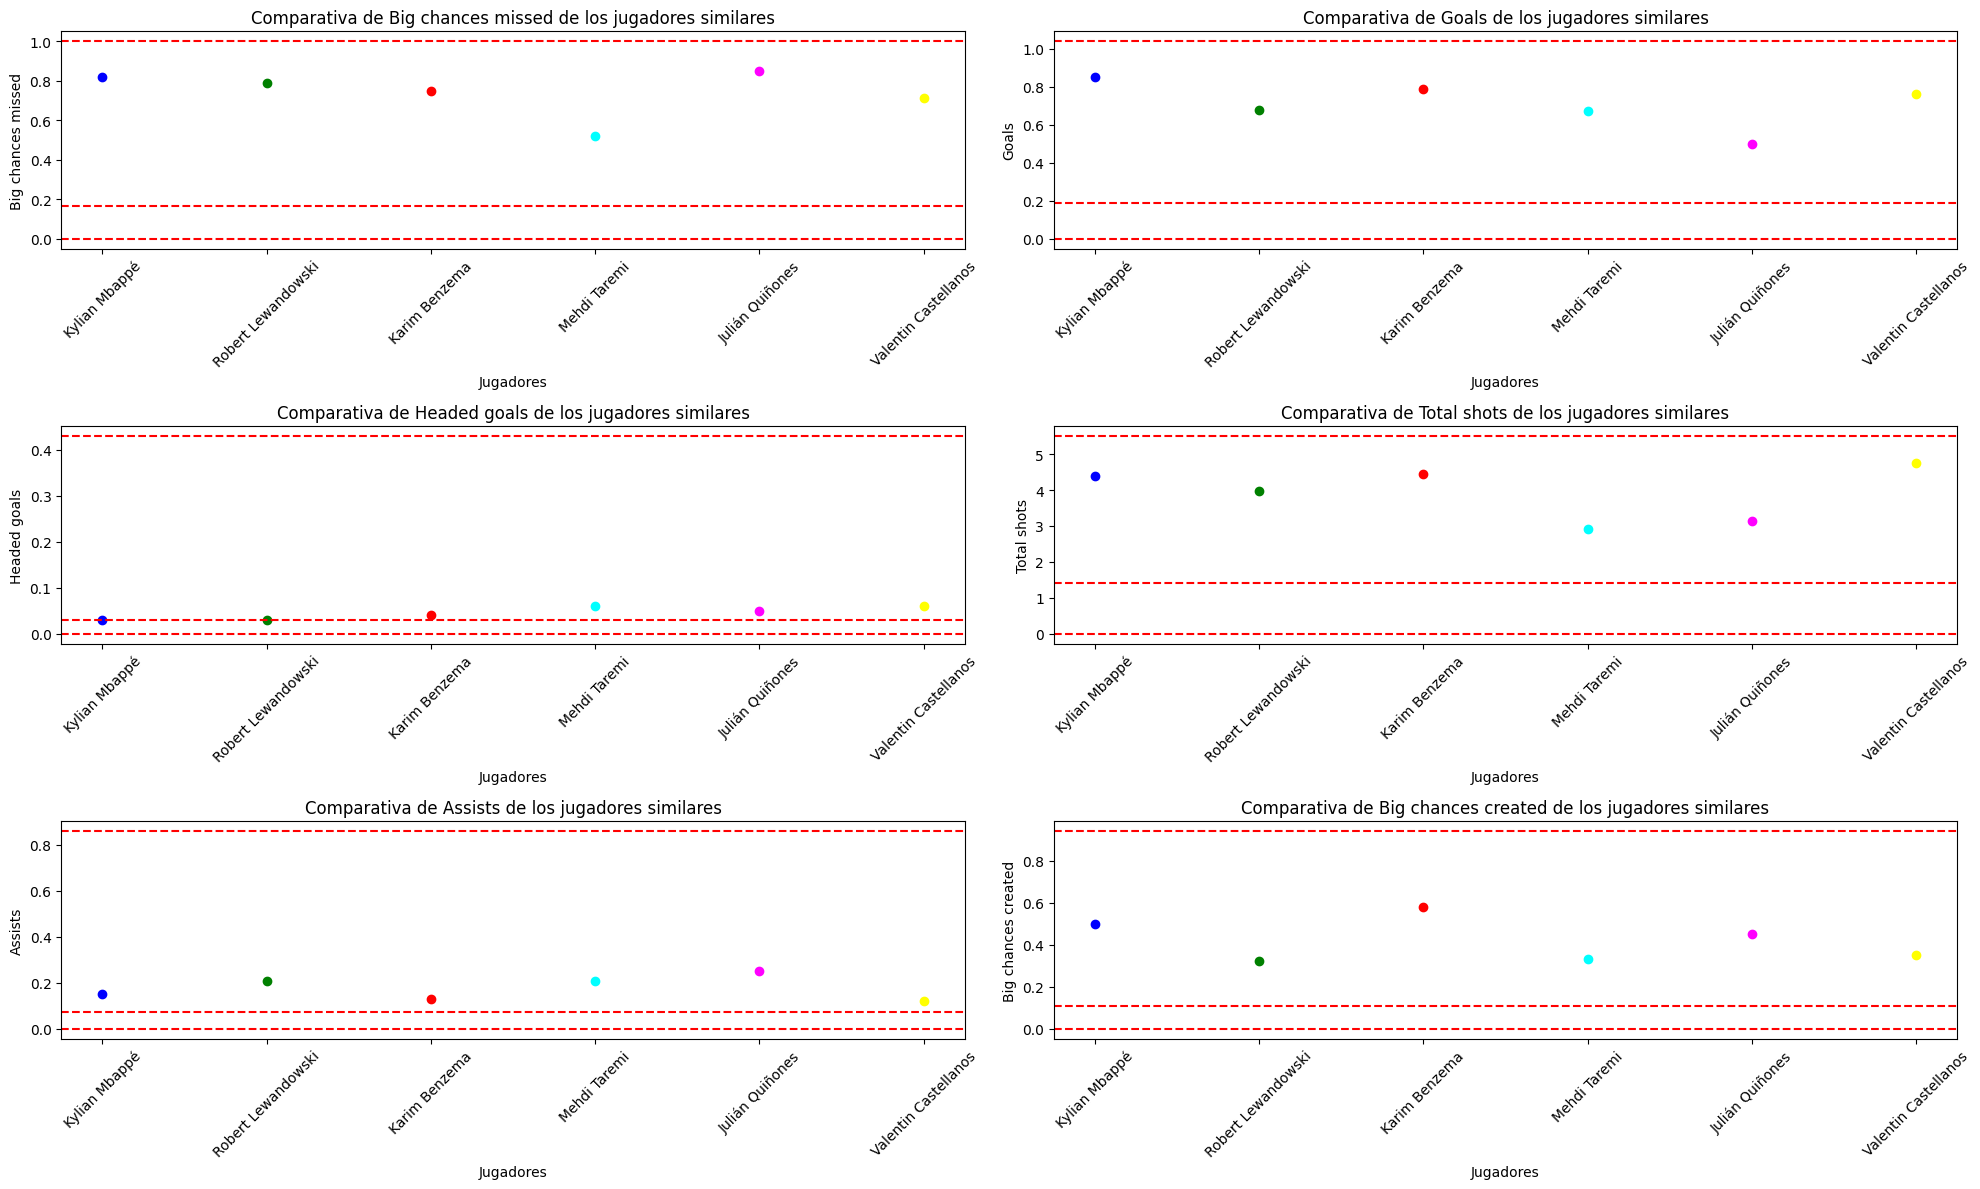

In [61]:
buscar_jugadores_similares('Kylian Mbappe', caracteristicas_grafico)